In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rc('figure', figsize=(16,9), dpi=100)
pd.options.plotting.backend = 'holoviews'

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [2]:
df = pd.read_csv('data/raw/data_binance.csv')
df.set_index('timestamp', inplace=True)
df.head()

,ask,bid,asksize,bidsize,sell_qty,buy_qty
timestamp,,,,,,
2021-02-25T17:01:31.296035,50531.85,50528.71,0.260000,1.000000,15.656524,23.955780
2021-02-25T17:01:36.794538,50530.12,50520.55,0.057893,0.435920,2.459863,4.371013
2021-02-25T17:01:42.284479,50527.46,50527.45,0.262615,0.740739,0.252142,1.297689
2021-02-25T17:01:47.767470,50546.39,50543.52,0.178088,0.060905,4.029092,1.010848
2021-02-25T17:01:53.686262,50516.41,50512.42,0.007930,0.231455,2.226948,1.904901


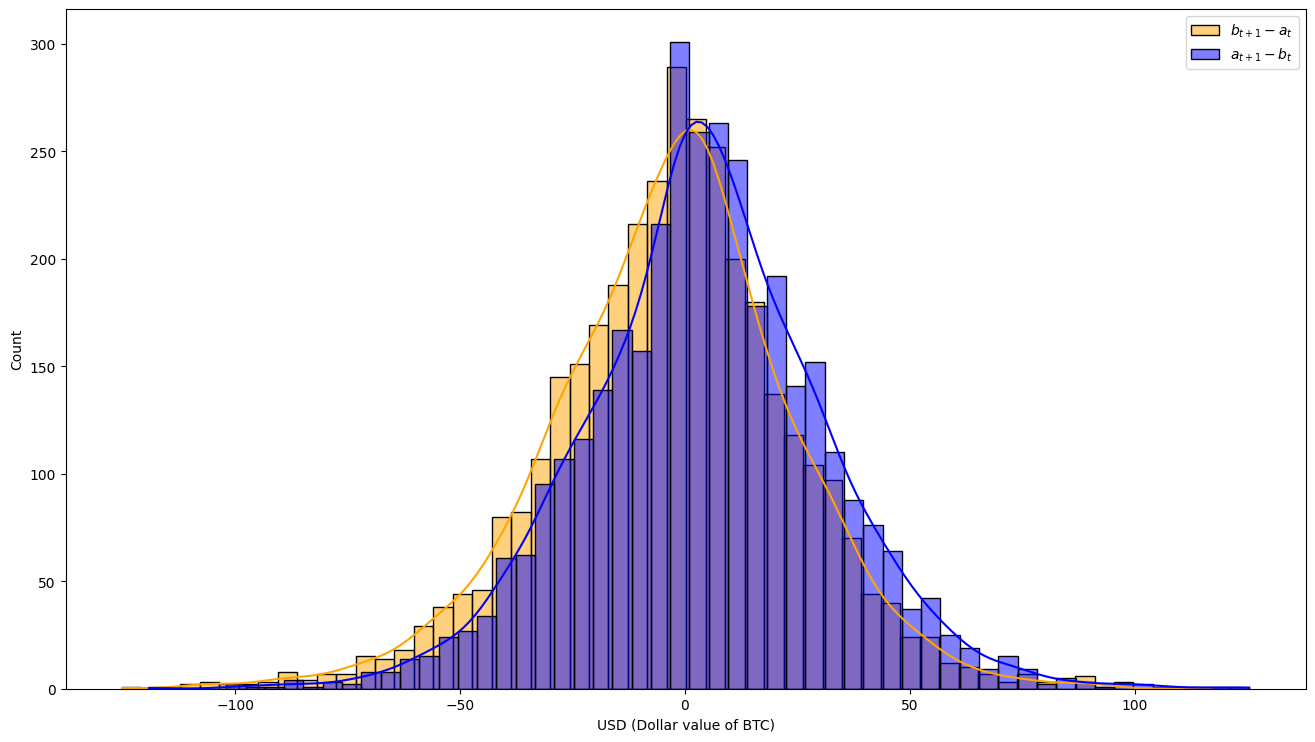

In [3]:
df['u'] = df.bid.shift() - df.ask
df['v'] = df.ask.shift() - df.bid
sns.histplot(x='u',data=df,color='orange',label='$b_{t+1} - a_t$',kde=True)
sns.histplot(x='v',data=df,color='blue',label='$a_{t+1} - b_t$',kde=True)
plt.xlabel('USD (Dollar value of BTC)')
plt.legend()

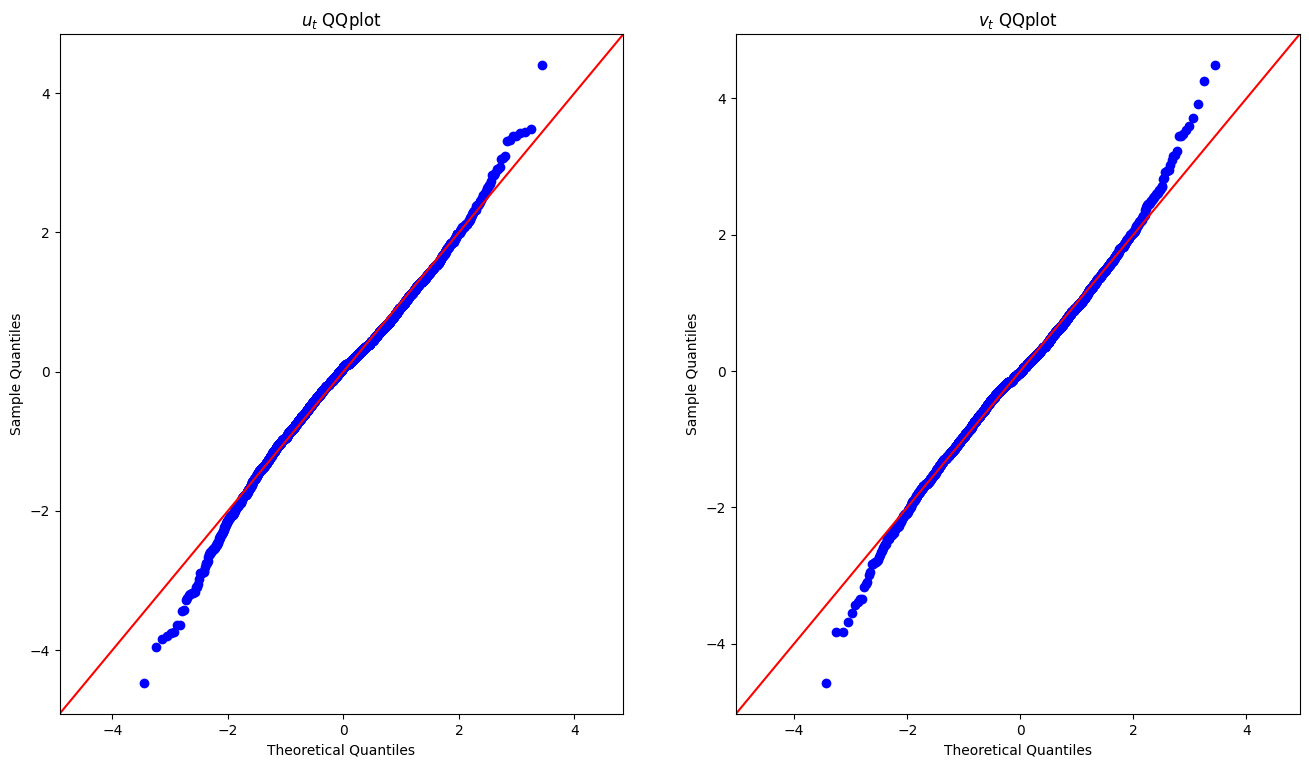

In [4]:
fig, ax = plt.subplots(1,2)
_ = sm.qqplot(df.u.dropna(), fit=True, line="45", ax=ax[0])
_ = sm.qqplot(df.v.dropna(), fit=True, line="45", ax=ax[1])
_ = ax[0].set_title('$u_t$ QQplot')
_ = ax[1].set_title('$v_t$ QQplot')

Text(0.5, 1.0, 'PACF plot of $v_t$')

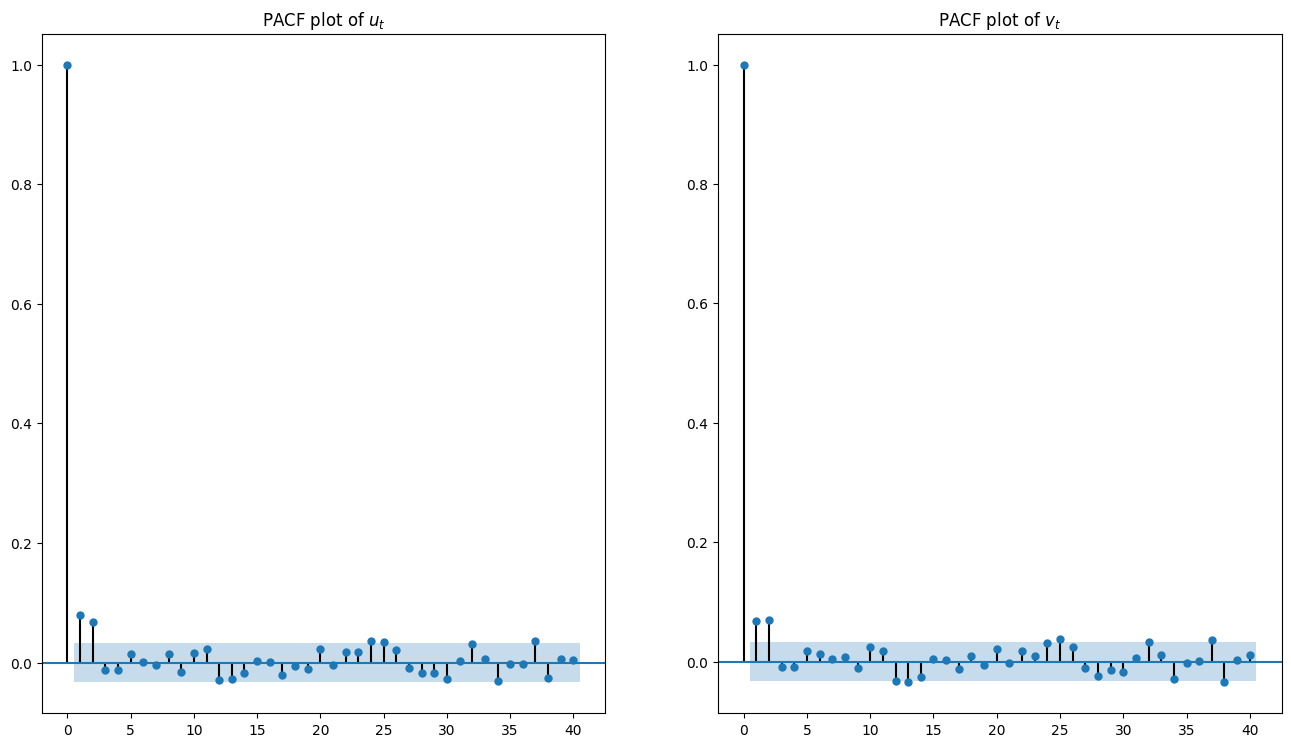

In [5]:
# target acf / pacf plots
fig, ax = plt.subplots(1,2)
_ = sm.graphics.tsa.plot_pacf(df.u.dropna(), lags=40, ax=ax[0])
_ = sm.graphics.tsa.plot_pacf(df.v.dropna(), lags=40, ax=ax[1])

ax[0].set_title('PACF plot of $u_t$')
ax[1].set_title('PACF plot of $v_t$')

In [6]:
df['ofi'] = (df.ask.diff() >= 0).astype(int) * df.asksize.shift(-1).apply(np.abs) -\
              (df.ask.diff() <= 0).astype(int) * df.asksize.apply(np.abs) +\
              (df.bid.diff() >= 0).astype(int) * df.bidsize.apply(np.abs) -\
              (df.bid.diff() <= 0).astype(int) * df.bidsize.shift(-1).apply(np.abs) 

In [26]:
df['spread'] = df.ask - df.bid
df['mid'] = df.ask/2 + df.bid/2

In [27]:
df['u_since_ch'] = (df['u'] > 0).astype(int).replace(0, -1)
df['u_since_ch'].iloc[0] = 0
df.groupby((df['u_since_ch'] != df['u_since_ch'].shift()).cumsum()).cumsum()

/Users/mark02/.pyenv/versions/research/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ask,bid,asksize,bidsize,sell_qty,buy_qty,u,v,ofi,obi,spread,mid,u_1,v_1,u_2,v_2,u_since_ch
timestamp,,,,,,,,,,,,,,,,,
2021-02-25T17:01:31.296035,50531.85,50528.71,0.260000,1.000000,15.656524,23.955780,NaN,NaN,0.000000,-0.587302,3.14,50530.280,-1.41,11.30,-6.91,2.67,0
2021-02-25T17:01:36.794538,50530.12,50520.55,0.057893,0.435920,2.459863,4.371013,-1.41,11.30,-0.798632,-0.765527,9.57,50525.335,-6.91,2.67,-18.94,-16.06,-1
2021-02-25T17:01:42.284479,101057.58,101048.00,0.320508,1.176659,2.712005,5.668702,-8.32,13.97,-0.320508,-1.242052,9.58,101052.790,-25.85,-13.39,8.17,17.91,-2
2021-02-25T17:01:47.767470,151603.97,151591.52,0.498596,1.237564,6.741097,6.679550,-27.26,-2.09,-0.251673,-0.751733,12.45,151597.745,1.26,20.58,7.97,23.82,-3
2021-02-25T17:01:53.686262,50516.41,50512.42,0.007930,0.231455,2.226948,1.904901,27.11,33.97,-0.154902,-0.933747,3.99,50514.415,-0.20,5.91,8.39,11.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-25T22:25:06.580225,387168.00,387134.09,2.036917,13.939991,37.136204,41.801037,-96.50,-20.72,14.696851,-2.124937,33.91,387151.045,-68.22,-5.88,-27.59,39.01,-8
2021-02-25T22:25:12.506739,48395.84,48390.19,0.009986,0.006000,1.813894,3.723228,7.27,12.93,-0.130901,0.249343,5.65,48393.015,17.61,33.06,3.47,27.52,1
2021-02-25T22:25:17.997269,96768.42,96752.97,0.062432,0.126915,2.936860,9.142031,24.88,45.99,-0.324311,-0.145607,15.45,96760.695,21.08,60.58,16.40,71.73,2


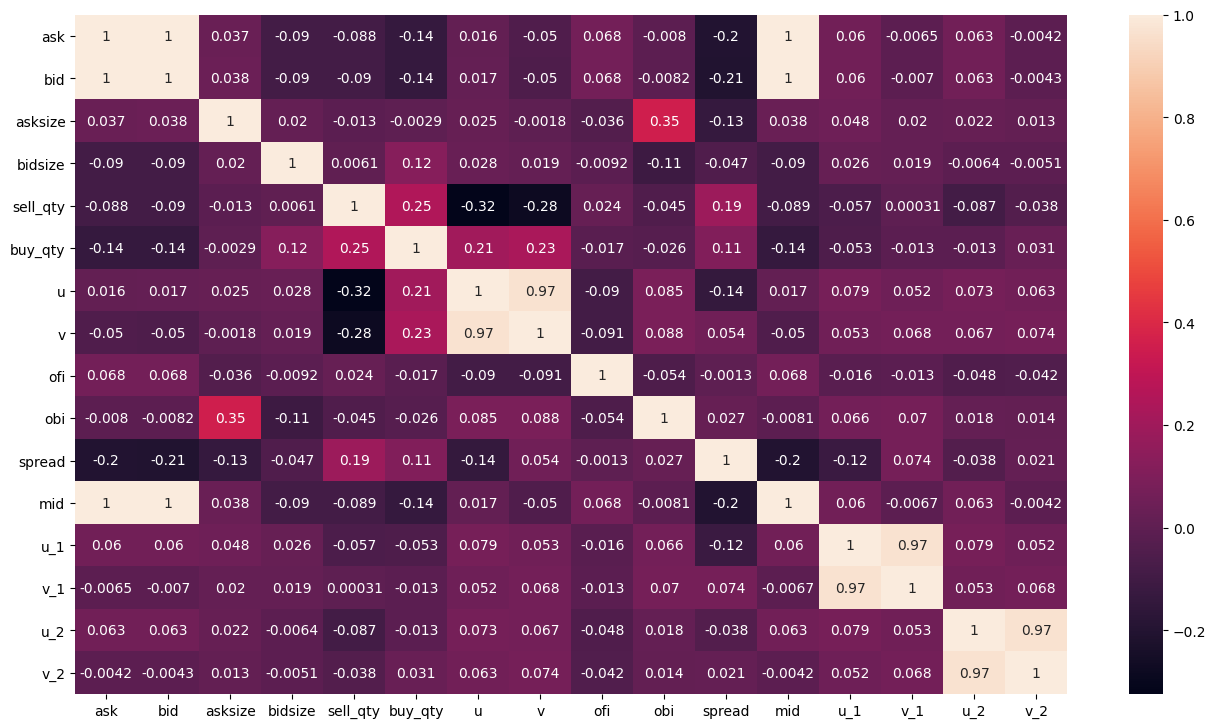

In [23]:
df['u_1'] = df.u.shift(-1)
df['v_1'] = df.v.shift(-1)
df['u_2'] = df.u.shift(-2)
df['v_2'] = df.v.shift(-2)
sns.heatmap(df.corr(), annot=True)

# Features 

In [24]:
from sklearn.feature_selection import mutual_info_regression
_d = df.dropna().drop(['v','u','v_1','v_2'],axis=1).copy()
out = pd.DataFrame([dict(zip(_d.columns,mutual_info_regression(_d, df.dropna().u)))])
out

,ask,bid,asksize,bidsize,sell_qty,buy_qty,ofi,obi,spread,mid,u_1,u_2
0,0.036557,0.031312,0.017436,0.0,0.130748,0.057676,0.544508,0.007111,0.027355,0.032178,0.007738,0.0


In [25]:
_d = df.dropna().drop(['v','u','u_1','u_2'],axis=1).copy()
out = pd.DataFrame([dict(zip(_d.columns,mutual_info_regression(_d, df.dropna().v)))])
out

,ask,bid,asksize,bidsize,sell_qty,buy_qty,ofi,obi,spread,mid,v_1,v_2
0,0.032022,0.034966,0.0,0.00093,0.107794,0.106121,0.55695,0.033746,0.008083,0.035617,0.015654,0.0


##### Conclusion
Relevant features appears to be, order flow imbalance, information regarding number of trades
during period $[t, t + \Delta t ]$ and order book volume information at time $t$. As shown in the acf plot
first order lag information is relevant too.

In [ ]:
DEBUG = 1

QTY = 13
wealth = np.zeros(T)
eps = 0

def loss1(sign, t, eps = 30.):
    if sign > 0:
        return np.minimum(eps, sign*u[t]) 
    else:
        return 0
def loss2(sign, t ,eps = 30.):
    if sign < 0:
        return np.minimum(eps, sign * v[t]) 
    else:
        return 0


eps_u = np.ones(T) * 100
eps_v = np.ones(T) * 100

a = 3

M1 = a * np.eye(p)
M1_inv = 1/a * np.eye(p)
M2 = a * np.eye(p)
M2_inv = 1/a * np.eye(p)

errors = 0

for t in range(T-1):
    # prediction
    y_pred1 = np.sign(np.dot(w1[t],x1[t]))
    y_pred2 = np.sign(np.dot(w2[t],x2[t])) if y_pred1 !=1 else 1

    # suffer loss 
    gains1 = loss1(y_pred1, t, QTY)
    gains2 = loss2(y_pred2, t, QTY)
    wealth[t+1] = wealth[t] + gains1 + gains2

    # SOP Update
    mistake1 = y_pred1 * np.sign(u[t]) <= 0
    mistake2 = y_pred2 * np.sign(v[t]) <= 0
    
    if DEBUG:
        errors += int(mistake1) + int(mistake2)
    
    grad1 = x1[t] * np.sign(u[t]) * int(mistake1)
    grad2 = x2[t] * np.sign(v[t]) * int(mistake2)

    increase_1 = np.outer(x1[t],x1[t]) * int(mistake1)
    increase_2 = np.outer(x2[t],x2[t]) * int(mistake2)

    M1 = M1 + increase_1
    M1_inv = M1_inv - M1_inv.dot(increase_1).dot(M1_inv)/(1+ x1[t].dot(M1_inv).dot(x1[t]))
    M2 = M1 + increase_2
    M2_inv = M2_inv - M2_inv.dot(increase_2).dot(M2_inv)/(1+ x2[t].dot(M2_inv).dot(x2[t]))
    
    ### update 
    w1[t+1] = M1_inv.dot(_w1[t])
    _w1[t+1] = _w1[t] + grad1
    w2[t+1] = M2_inv.dot(_w2[t])
    _w2[t+1] = _w2[t] + grad2

print(f'accuracy {np.round(1-errors/(2*T),2)}')